## An Introduction to Bayesian Modeling 

One of the most powerful ideas that comes out of using the Bayesian statistics we've learned in class is the idea of Bayesian inference.
One of the best ways to describe what Bayesian inference means is through an example.

> You are looking for a place out to eat. After finding a place, you want to make sure that you won't waste your time and money so you go and read the reviews. The first review you reads "This place has amazing food!". The next set of reviews also have a similiar tone to them reasurring you that the restaurant might be a good choice after all... 

This way of thinking is exactly what Bayesian inference is. The idea of simply updating your beliefs after considering new evidence.

We can try to leverage this way of thinking to create an algorithm that can use Bayesian inference in a wide variety of problems. One of the more straightforward algorithms is called the Naive Bayes Classifier. We're going to look at the inner workings of this algorithms by taking the example of classifying restaurant reviews.


## Naive Bayes: A Straightforward Introduction to Bayesian Iference for Machine Learning 

Naive Bayes is what is called a reinforcement learning algorithm. It takes in a sample dataset and uses that data to predict outcomes from data that it has never seen before. In our Example we're going to use a mock dataset that corresponds to positive and negative restaurant reviews. From this small set of data we will then predict wheter new reviews are positive or negative. 

### Notebook Outline

1. Gathering Dataset and Training Naive Bayes
2. Testing with basic predictions
3. Dealing with never seen words
4. Naive Bayes Real World Scenario 

## Step 1: Gather Dataset and Train The Classifier

The most important step in all of this is gathering our dataset. Our results can vary wildly depending on how good our data is. For this example I created a sample dataset to keep things simple. 



In [1]:
"""
These lines of code don't matter much and are more for importing libraries such that the notebook isn't cluttered with code
"""
import os
from matplotlib import pyplot as plt
import pandas as pd 
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual,interactive_output
from IPython.display import display, Markdown
import ipywidgets as widgets
from naive_bayes import NaiveBayes
plt.style.use('ggplot')


"""
We are going to make a mock dataset to try to classify restaurant reviews as either positive or negative
"""

# this piece of code makes sure the notebook finds the needed files correctly!
abspath = os.path.abspath('')
os.chdir(abspath)

restaurant_data = pd.read_csv("restaurant_reviews.csv")
restaurant_data

,text,label
0,simply loved it,1
1,this food was bad,0
2,really good food,1
3,terrible taste,0
4,this food good,1
5,loved taste,1
6,bad ambiance,0
7,i loved it so bad,1
8,i simply loved this good food,1
9,it wasn't good,0


Now we a small dataset to train on. Every row corresponds to a review which has a label for either being a positive or negative review 
and a set of words that corresponds to the review.

Notice how all words are lowercase and punctuation has been cut. This is an important step because we want to keep the data consistent when we train our model and when we predict on new data. Making everything lowercase and cutting punctuation makes it easier to learn from our data without chaning the end results.

Now to train we take each time a word shows up for each label and add it to a bag of words that corresponds to the label.

In [2]:
naive_bayes_classifier = NaiveBayes()
naive_bayes_classifier.train(restaurant_data)

naive_bayes_classifier.table()

,good,bad
simply,2,0
loved,4,0
it,2,1
really,1,0
good,3,1
food,3,1
this,2,1
taste,1,1
i,2,0
so,1,0


From the table above we can see that our Naive Bayes now has a bag of words. Each column corresponds to a bag with labels 1 and 0 respectively.

Each word has the number of times it has occured in our training data. We can now say that our model is trained!

## Step 2: Calculating Basic Predictions

Now the Naive-Bayes classifier has been trained. It contains a bag of words that we can use to begin classifying 
sentences into either:

 **positive (1)** or **negative (0)** reviews.

 Now lets calculate wether a new review is positive or negative. Assume we ask our model to predict whether the following sentence is a positive or negative review 

 <center><b>Food taste good</b></center>

 Not the most elegant review but a good example nonetheless. 

Now our prediction follows the following steps

1. Process the data to make usable by the model 
2. Find the probabilitiy of the sentence belonging to each label
3. Return the label from which the probabilitiy is the highest 

First, we want to process this sentence such that we can use it in our naive bayes model. we split the sentence into its component words and make it a list of words

$Food$ $taste$ $good$ $\rightarrow [food,taste,good]$

Now from the list of words we ask the question, given a specific word, what is the probabilitiy that our review is positive or negative?

For each individual word, we simply look at the frequency each word pops up in our bag of words. A good visualization of this is making a histogram for the frequency of each word in our training set

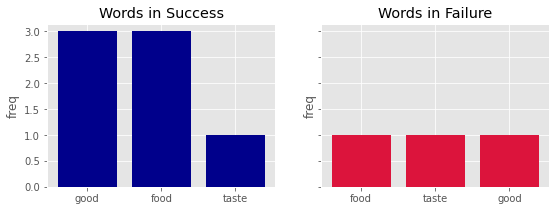

In [3]:
fig, axs = naive_bayes_classifier.historgram("taste","good", "food")

Let's take a look at the word $good$

Given that we have the word $good$, what is the probability that our review is positive?

$P(review = 1 | word = good)$

By Baye's rule this is $ {\Large \frac{P(word = good | review = 1) P(review = 1)} {P(word = good)} }$

### Looking at each term:

* $P(word =good | review = 1)$ -> number of times that the word "good" was in a training examlpe with label "1" divided by the number of times it was in the dataset

* $P(review =1 )$ -> number of training examples that were labeled as "1" (positive reviews) divided by the total number of reviews

* $P(word = good)$ -> number of times that the word "good" shows up in our training data relative to all other words

Since we are dealing with a binary choice of labels we can rewrite the $P(word = good)$ as 

${\large P(word = good) = P(word = good | review = 1)P(review = 1) + P(word = good| review = 0)P(review = 0)}$

From the probabilities listed above we can simply get the counts from our bag of word to calculate the probability of seeing a review that is positive given the word good


In [6]:

good_count = naive_bayes_classifier.get_word_count('good') # get how many times the word 'good' shows up 
good_pos_prob = good_count[1]/ (good_count[1]+ good_count[0]) # P(word = good | review = 1)
good_neg_prob =good_count[0]/ (good_count[1]+ good_count[0])# P(word = good | review = 0)

positive_count = naive_bayes_classifier.get_count(1) # get how many positive reviews were in the training set
negative_count = naive_bayes_classifier.get_count(0) # get how many negative reviews were in the training set

positive_probability = positive_count/ (positive_count  + negative_count) # P(review = 1)
negative_probability = negative_count/ (positive_count  + negative_count) # P(review = 0)

total_good_prob_bayes = good_pos_prob*positive_probability + good_neg_prob*negative_probability

total_probability = good_pos_prob * positive_probability/ total_good_prob_bayes # bayes rule


print(f"P(good | 1) = {good_pos_prob:.2f} P(good | 0) = {good_neg_prob:.2f} P(0) = {negative_probability:.2f} P(1) = {positive_probability:.2f} P(1 | good ) = {total_probability:.2f}")

# single_word_probability()

P(good | 1) = 0.75 P(good | 0) = 0.25 P(0) = 0.33 P(1) = 0.67 P(1 | good ) = 0.86


From the calculations above we see that the probability that a review is positive given the word "good" is about 86%. 

Our classifier did nothing more than grab count from its bag of words and calculate the probability from Bayes rule and this is exactly how the naiva Bayes classifier we've buil does it as well. 


In [5]:
word_good_classifier_prob = naive_bayes_classifier.get_conditional_probability_given_word("good")
print(f"Probability according to naive bayes {word_good_classifier_prob[1]:.2f}")

Probability according to naive bayes 0.86


### Now finding the probability of multiple words

We can easily find and label a one word review as either positive or negative but what do we do with our three word sentence review? We want to find the probability that a review is either positive or negative given a set number of words. This can be written as 

$ {\large P(review = positive | word_1 = food \cap word_2 = taste \cap word_3 = good )} $

There are multiple ways of finding this joint probability. One approach is by directly looking for any reviews that have the words $food$, $taste$, $good$, which can lead to a lot of difficulties. Either we have to keep looking through our training every time we want to make a prediction or we have to store every single possible word combination we run across. Even then we are not guaranteed to have seen a review with any arbitrary set of words we want. 

Instead we can remember the idea of joint independent probabilities. The formula for two events A and B given that A and B are independent from each other is 

${\large P(A \cap B) = P(A)P(B)}$

In our case we can rewrite the probability of seeing each specific review as the product of the probabilities of seeing each individual word much like just looking at a one word review.

So 

$ P(review = positive | word_1 = food \cap word_2 = taste \cap word_3 = good )  = P(review = positive | word = food)P(review = positive | word = taste)P(review = positive | word = food)$


Now this is not entirely true. The fact that a word such as $good$ is in a review may indeed change the probability we see some other words such as $bad$ but in practice this assumption creates results that are very accurate even with small datasets.

This means that for Naive Bayes, we follow the following procedure

```
1. For every word in our review:
     a. Look up how many times the word appears for each label in our bag of words
     b. Use Baye's rule to calculate the probability shows up for each label (eg : P(word = "good" | label  = "positive review"))
     In our example we find the probability that we see each word in a positive and negative review. 

2. Take the product of the conditional probabilities of each word and multiply them together to find the probability that a sentence belongs to a specific label
```

The equation for this process can be written as

${\Large P(label = i | word_1 \cap word_2 \cap ... \cap word_n  ) =} {\Large  \frac{ (\prod_{k = 1}^{n} P(word_k | label = i ) ) \cdot P(label = i) }{\sum_{label = i}^{m} ((\prod_{k = 1}^{n} P(word_k | label = i )  \cdot P(label = i) )} } $

Or the product of the probabilities of each word being in a specific label divided by the total probabilities each word belongs to all the labels

In [6]:
def sentence_prediction():
    """
    Lets find the probability that the review: food taste good is a positive review
    """

    # First find the probabilities each word belongs to the positive-negative labels. This is done by looking inside the bag of words
    food_prob = naive_bayes_classifier.get_word_conditional_prob('food') # this gets P(word = food | review = positive) and P(word = food | review = negative)
    taste_prob = naive_bayes_classifier.get_word_conditional_prob('taste')
    good_prob = naive_bayes_classifier.get_word_conditional_prob('good')
    # Now find the total amount of positive and negative reviews we had
    total_positive_reviews = naive_bayes_classifier.get_count(1)
    total_negative_reviews = naive_bayes_classifier.get_count(0)
    positive_review_prob = total_positive_reviews/ (total_positive_reviews + total_negative_reviews)# P(X = 1)
    negative_review_prob = total_negative_reviews/ (total_positive_reviews + total_negative_reviews)# P(X = 0)
    # Find the probability that each word shows up for each label 
    prob_word_in_positive_review = good_prob[1] * taste_prob[1] * food_prob[1] * positive_review_prob 
    prob_word_in_negative_review = good_prob[0] * taste_prob[0] * food_prob[0] * negative_review_prob
    # Now bayes rule!
    prob_review_positive = prob_word_in_positive_review / (prob_word_in_positive_review + prob_word_in_negative_review)
    prob_review_negative = prob_word_in_negative_review/(prob_word_in_negative_review + prob_word_in_positive_review)
    # this is the same as the predict function
    prediction = naive_bayes_classifier.predict('food taste good')

    print(f"Our calculated predictions: probability review is positive {prob_review_positive : .2f} , probability review was negative {prob_review_negative : .2f}")
    print(f"The builtin naive bayes prediction: positive: {prediction[1]: .2f}, negative{prediction[0]: .2f}, prediction {prediction['prediction']}")
sentence_prediction()

Our calculated predictions: probability review is positive  0.95 , probability review was negative  0.05
The builtin naive bayes prediction: positive:  0.95, negative 0.05, prediction 1


## Step 3: Dealing with never before seen words

As is the the current Classifier is very robust but still has one key drawback. To show this, we will look at the following review 

 <center><b>Food was really bad</b></center>

In [7]:
def zero_probability():
    sentence = "Food was really bad."
    prediction = naive_bayes_classifier.predict(sentence)
    print(f"Our prediction, \npositive: {prediction[1]: .2f} \nnegative{prediction[0]: .2f}, \nprediction {prediction['prediction']}")

zero_probability()

Our prediction, 
positive:  0.00 
negative 0.00, 
prediction 1


We predicted 0% chance of this review being either positive or negative!

To see why this happens we need to see the bag of words for the naive bayes

In [8]:
naive_bayes_classifier.filtered_table("food", 'was', 'really', 'bad')

,good,bad
really,1,0
food,3,1
bad,1,2
was,0,1


## Restaurant Review Demo

Hi! below is a small interactive demo for naive bayes. It shows the histograms for a couple of words and lets you predict from an input sentence!

In [9]:

#Getting interactive components!
from interactive_components import set_classifier, interactive_hist
interactive_bayes = NaiveBayes()
interactive_bayes.train(restaurant_data)
set_classifier(interactive_bayes)


interact(interactive_hist,
good_pos =widgets.IntSlider(min=1, max=20, step=1, value=naive_bayes_classifier.get_word_count('good')[1]),
really_pos = widgets.IntSlider(min=1, max=20, step=1, value=naive_bayes_classifier.get_word_count('really')[1]),
good_neg= widgets.IntSlider(min=1, max=20, step=1, value=naive_bayes_classifier.get_word_count('good')[0]),
sentence = "Food taste good"
)


<function interactive_components.interactive_hist(**kwargs)>

## Real World Example: Naive Bayes to find Spam SMS

in this example we are going to train our naive bayes classifier 

# Acknowledgements

All of the information on this notebook is a cumilnation of the information on the following pages and videos 

[Sci-kit leanrs page on naive bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

[Wikipedia Article on Naive Bayes and Document Classification problem](https://en.wikipedia.org/wiki/Naive_Bayes_classifier#Document_classification)

[stat quest live-stream ](https://youtu.be/bTs-QA2oJSE)

[video: naive bayes: A friendly approach](https://youtu.be/Q8l0Vip5YUw)

The datasets were provided by the UCI Machine Learning Repository [link](https://archive.ics.uci.edu/ml/index.php)

* [positive-negative reviews dataset (IMBD, Amazon, Yelp)](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences)

* [SMS Spam Dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection)

